# Contact structure comparison
In this notebook the comparison of the random contact structure and the original one is performed and the appropriate graphs that aim to highlight the differences are created.

In [1]:
#DANE+ BIBLIOTEKI
%store -r G 
%store -r S_normal #to z PRACA 1, czyli ile osób zarazi przy losowym wyborze 
import networkx as nx
import matplotlib.pyplot as plt
import random
import statistics
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

no stored variable #to z PRACA 1, czyli ile osób zarazi przy losowym wyborze


In [2]:
data=open("C:/Users/wojci/Documents/Studia/praca/DANE/dane.txt","r")
data=data.readlines()
contacts=[]
nodes=[]
times=[]
#OBRÓBKA DANYCH
for i in range(0,len(data)):
    row=data[i]
    row=row.split()
    nodes.append(int(row[1]))
    nodes.append(int(row[2]))
    times.append(int(row[0])/60/60/24)
nodes=set(nodes)
nodes=list(nodes)  #tak otrzymuję wszystkie wierzchołki jakie są w sieci podczas całego badania

for i in range(0,len(data)):
    row=data[i]
    row=row.split()
    contacts.append((int(row[0])//60/60/24,int(row[1]),int(row[2]))) #i teraz kontakty mamy w postaci (czas, node1,node2)

In [3]:
%store contacts

Stored 'contacts' (list)


In [3]:
%store -r contacts

In [4]:
#sprawdzenie
for i in contacts:
    try:
        a=G.edges[i[1],i[2]]
    except:
        print(i[1],i[2],'nie wyszlo mi')


In [5]:
edges=list(G.edges)
set_edges=set(edges)
cons=[]
for i in contacts:
    cons.append((i[1],i[2]))
set_cons=set(cons)

In [6]:
for i in set_edges:
    [a,b]=list(i)
    if (a,b) in set_cons:
        pass
    else:
        if (b,a) in set_cons:
            pass
        else:
            print(i,'nie wyszlo mi')
#sprawdzone jest ok

In [7]:
#przyporzqdkuję wagi kontaktom
for i in list(G.edges):
    G.edges[i[0],i[1]]['weight']=0
    
for i in contacts:
    G.edges[i[1],i[2]]['weight']+=1
#sprawdzone l.konktaow równa sumie wag
%store G

Stored 'G' (Graph)


In [8]:
edge_weight={} #stworze sobie slownik z wagami {waga:ile razy wystapila}
liczba_kontaktow=len(contacts)
for i in list(G.edges):
    waga=G.edges[i[0],i[1]]['weight']
    if waga in edge_weight:
        edge_weight[waga]+=1
    else:
        edge_weight[waga]=1

In [9]:
for i in edge_weight:
    edge_weight[i]=[edge_weight[i],edge_weight[i]*i/liczba_kontaktow*100] #procentowo jaka czesc calosci, dany rodzaj kontaktu

In [10]:
a=[]
b=[]
c=[]
for i in edge_weight:
    a.append(i)
    b.append(edge_weight[i][0])
    c.append(edge_weight[i][1])

In [11]:
import pandas as pd
df=pd.DataFrame({'waga':a, 'ile razy':b,'jaka czesc':c}) #waga i ile razy wystapil kontakt tego rodzaju

In [12]:
df=df.sort_values(by='waga')

In [13]:
"""plt.scatter(df['ile razy'],df['waga'], s=df['jaka czesc'], cmap='spring', alpha=0.8,c=df['jaka czesc'])
plt.title('',size=15)
plt.xlabel('Ile razy',size=15)
plt.ylabel('Weight',size=15)"""

"plt.scatter(df['ile razy'],df['waga'], s=df['jaka czesc'], cmap='spring', alpha=0.8,c=df['jaka czesc'])\nplt.title('',size=15)\nplt.xlabel('Ile razy',size=15)\nplt.ylabel('Weight',size=15)"

In [14]:
"""plt.scatter(df['waga'],df['jaka czesc'])
plt.ylabel('procent')
plt.xlabel('waga')"""

"plt.scatter(df['waga'],df['jaka czesc'])\nplt.ylabel('procent')\nplt.xlabel('waga')"

In [15]:
#plt.stem(df['waga'],df.['jaka czesc'])

In [16]:
z=df['jaka czesc'].cumsum()
w=df['waga']
df2=pd.DataFrame({'waga':w,'jaka czesc':z})

In [17]:
#plt.stem(df['waga'],df['jaka czesc'].cumsum())

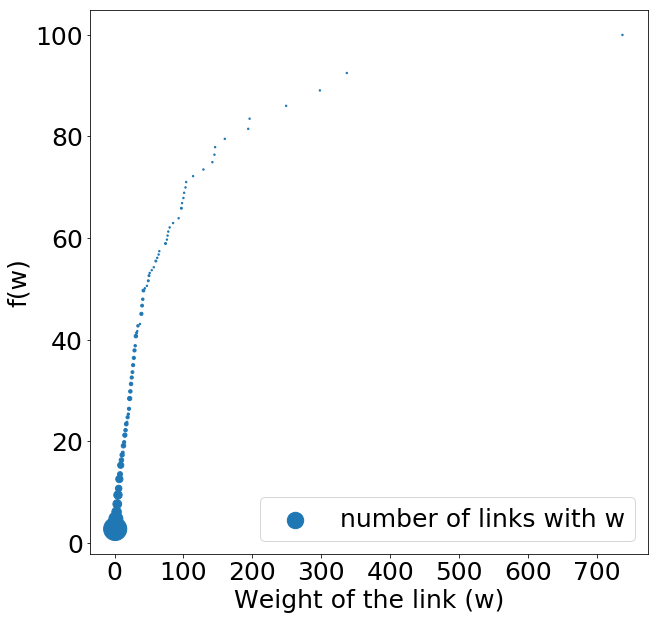

In [18]:
#plt.plot(df['waga'],df['jaka czesc'].cumsum())
f=25
plt.figure(figsize=(10,10)) 
plt.scatter(df['waga'],df['jaka czesc'].cumsum(),s=df['ile razy']*2,label='number of links with w'), #alpha=0.4)
plt.xlabel('Weight of the link (w)',fontsize=f)
plt.ylabel('f(w)',fontsize=f) 
plt.xticks(fontsize=f)
plt.yticks(fontsize=f)
#plt.title('f(w) for the original contact structure ',fontsize=f)
plt.legend(loc='lower right',fontsize=f)
a=plt.gcf()
a.savefig("C:/Users/wojci/Documents/Studia/praca/ZDEJCIA/rozdzial2/fworiginal.eps")
plt.show()

In [ ]:
#20 % kontaktów to są jakieś pojedyncze kontakty z ogromną wagą

In [21]:
""""data=open("C:/Users/wojci/Documents/Studia/praca/DANE/dane.txt","r")
data=data.readlines()
times=[]
#OBRÓBKA DANYCH
for i in range(0,len(data)):
    row=data[i]
    row=row.split()
    times.append(int(row[0])/60/60/24)

def random_contact_list():
    contacts=[]
    for i in range(0,len(times)):
        node1=0
        node2=0
        while node1==node2:
            node1=random.choice(list(G.nodes))
            node2=random.choice(list(G.nodes))
        contacts.append((times[i],node1,node2))
        
    return contacts

random_contacts=random_contact_list()"""
%store -r random_contacts

In [22]:
G_random=nx.Graph()

In [23]:
for i in random_contacts:
    if G_random.has_edge(i[1],i[2])==True:
        G_random.edges[i[1],i[2]]['weight']+=1
    else:
        G_random.add_edge(i[1],i[2],weight=1)

In [24]:
edge_weight_r={} #stworze sobie slownik z wagami {waga:ile razy wystapila}
liczba_kontaktow=len(contacts)
for i in list(G_random.edges):
    waga=G_random.edges[i[0],i[1]]['weight']
    if waga in edge_weight_r:
        edge_weight_r[waga]+=1
    else:
        edge_weight_r[waga]=1

In [25]:
for i in edge_weight_r:
    edge_weight_r[i]=[edge_weight_r[i],edge_weight_r[i]*i/liczba_kontaktow*100] #procentowo jaka czesc calosci, dany rodzaj kontaktu

In [26]:
a=[]
b=[]
c=[]
for i in edge_weight_r:
    a.append(i)
    b.append(edge_weight_r[i][0])
    c.append(edge_weight_r[i][1])

In [28]:
df_r=pd.DataFrame({'waga':a, 'ile razy':b,'jaka czesc':c}) #waga i ile razy wystapil kontakt tego rodzaju
df_r=df_r.sort_values(by='waga')

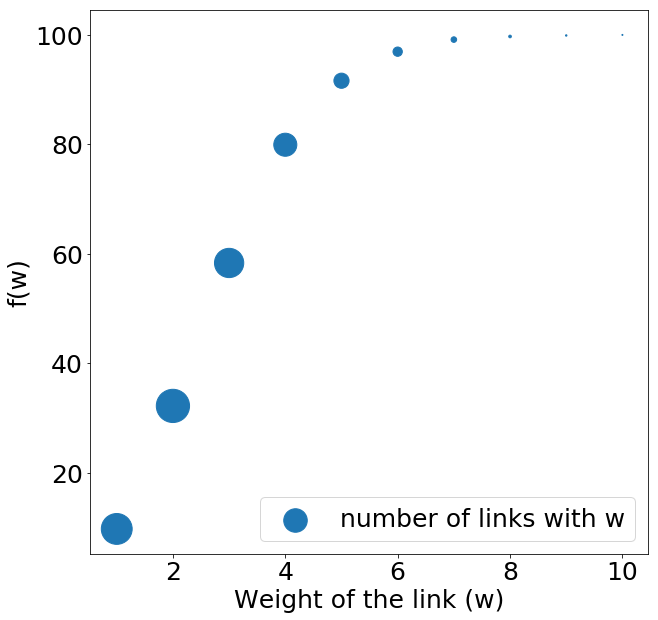

In [29]:
#plt.plot(df_r['waga'],df_r['jaka czesc'].cumsum())
f=25
plt.figure(figsize=(10,10)) 

plt.scatter(df_r['waga'],df_r['jaka czesc'].cumsum(),s=df_r['ile razy'],label='number of links with w'), #alpha=0.4)
plt.xlabel('Weight of the link (w)',fontsize=f)
plt.ylabel('f(w)',fontsize=f) 
#plt.title('f(w) for the random contact structure ',fontsize=f)
plt.legend(loc='lower right',fontsize=f)
plt.xticks(fontsize=f)
plt.yticks(fontsize=f)

a=plt.gcf()
a.savefig("C:/Users/wojci/Documents/Studia/praca/ZDEJCIA/rozdzial2/fwrandom.eps")
plt.show()

In [ ]:
#przeczytam sobie o tym scale free i preferential attachmetnt + ten artykuł co on mi wysłał

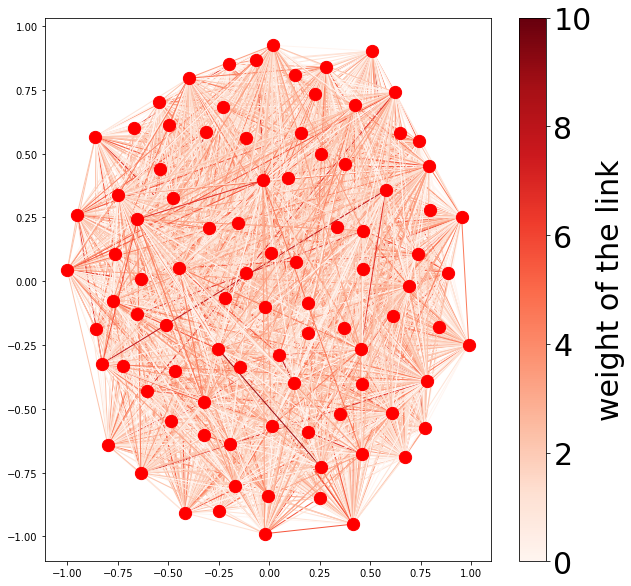

In [39]:
G_day=G_random
edges,weights = zip(*nx.get_edge_attributes(G_day,'weight').items())

plt.figure(figsize=(10,10)) 

pos=nx.kamada_kawai_layout(G_day)
    
nx.draw_networkx_nodes(G_day,pos,node_size=150)#,node_cmap=plt.cm.viridis)
    
mini=0
nx.draw_networkx_edges(G_day,pos, width=1,edgelist=edges, edge_color=weights, edge_cmap=plt.cm.Reds,
norm=plt.Normalize(vmin = 1, vmax=10))

sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds,norm=plt.Normalize(vmin = 0, vmax=10))
sm._A = []
cb=plt.colorbar(sm)
cb.ax.tick_params(labelsize=30)
cb.set_label( label="weight of the link",fontsize=30)



#plt.title('Network with the random contact structure',fontsize=15)
    #nx.draw(G_day,pos,node_size=a,width=b)
    #nx.draw_networkx_nodes(G_day,pos,node_color=list(nx.get_node_attributes(limited_G,'chance').values()),
     #   node_size=a)#,node_cmap=plt.cm.viridis)

    #nx.draw_networkx_edges(limited_G,pos, width=4,edgelist=edges, edge_color=weights, edge_cmap=plt.cm.Reds,
     #        norm=plt.Normalize(vmin = a, vmax=500))
f=20
"""if title==3:
    plt.title('After '+str(title)+'rd day')#+', nr of links: '+str(G_day.number_of_edges()),fontsize=f)
else:
    plt.title('After '+str(title)+'th day')#+', nr of links: '+str(G_day.number_of_edges()),fontsize=f)
plot+=1
    
a=plt.gcf()
a.savefig("C:/Users/wojci/Documents/Studia/praca/ZDEJCIA/rozdzial2/"+"network_vis"+str(title)+".eps")
plt.show()"""

a=plt.gcf()
a.savefig("C:/Users/wojci/Documents/Studia/praca/ZDEJCIA/rozdzial2/net_vis_random.eps")
plt.show()

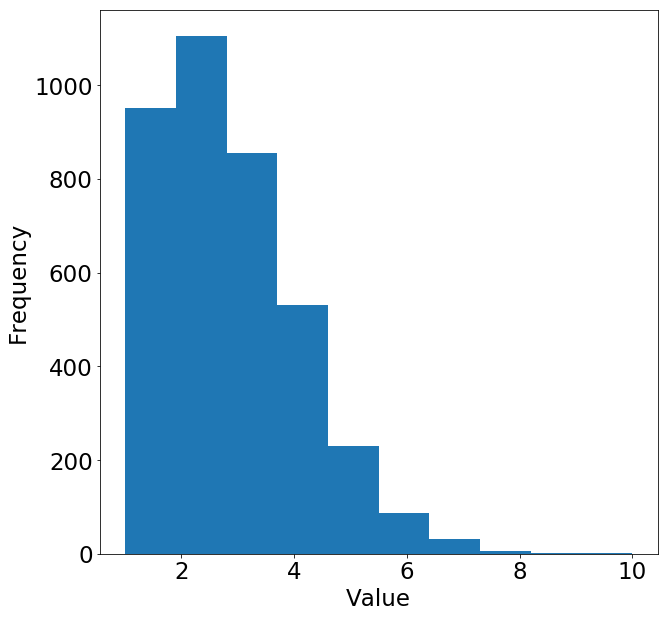

In [43]:
f=23
plt.figure(figsize=(10,10)) 
plt.hist(weights)
plt.xlabel('Value',fontsize=f)
plt.ylabel('Frequency',fontsize=f)
#plt.title('Histogram of the link weight',fontsize=f)
plt.xticks(fontsize=f)
plt.yticks(fontsize=f)

a=plt.gcf()
a.savefig("C:/Users/wojci/Documents/Studia/praca/ZDEJCIA/rozdzial2/weight_hist_random.eps")
plt.show()

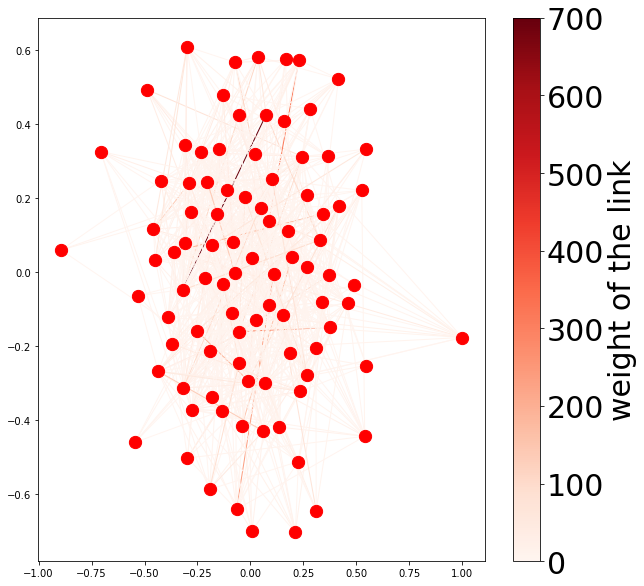

In [36]:
G_day=G
edges,weights = zip(*nx.get_edge_attributes(G_day,'weight').items())

plt.figure(figsize=(10,10)) 

pos=nx.kamada_kawai_layout(G_day)
    
nx.draw_networkx_nodes(G_day,pos,node_size=150)#,node_cmap=plt.cm.viridis)
    
mini=0
nx.draw_networkx_edges(G_day,pos, width=1,edgelist=edges, edge_color=weights, edge_cmap=plt.cm.Reds,
norm=plt.Normalize(vmin = mini, vmax=700))

sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds,norm=plt.Normalize(vmin = 0, vmax=700))
sm._A = []
cb=plt.colorbar(sm)
cb.ax.tick_params(labelsize=30)
cb.set_label( label="weight of the link",fontsize=30)

    #nx.draw(G_day,pos,node_size=a,width=b)
    #nx.draw_networkx_nodes(G_day,pos,node_color=list(nx.get_node_attributes(limited_G,'chance').values()),
     #   node_size=a)#,node_cmap=plt.cm.viridis)

    #nx.draw_networkx_edges(limited_G,pos, width=4,edgelist=edges, edge_color=weights, edge_cmap=plt.cm.Reds,
     #        norm=plt.Normalize(vmin = a, vmax=500))
f=20
#plt.title('Network with the original contact structure',fontsize=15)
"""if title==3:
    plt.title('After '+str(title)+'rd day')#+', nr of links: '+str(G_day.number_of_edges()),fontsize=f)
else:
    plt.title('After '+str(title)+'th day')#+', nr of links: '+str(G_day.number_of_edges()),fontsize=f)
plot+=1
 """   
a=plt.gcf()
a.savefig("C:/Users/wojci/Documents/Studia/praca/ZDEJCIA/rozdzial2/net_vis_given.eps")
plt.show()
    

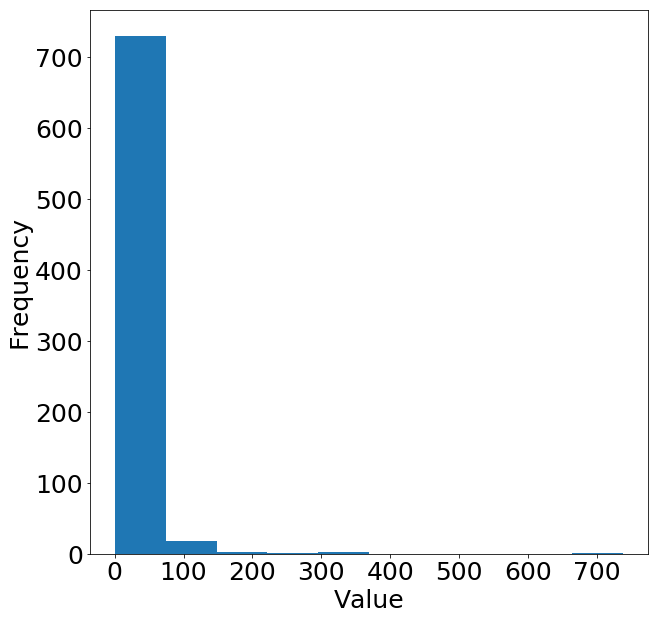

In [37]:
f=25
plt.figure(figsize=(10,10)) 
plt.hist(weights)
plt.xlabel('Value',fontsize=f)
plt.ylabel('Frequency',fontsize=f)
#plt.title('Histogram of the link weight',fontsize=f)
plt.xticks(fontsize=f)
plt.yticks(fontsize=f)

a=plt.gcf()
a.savefig("C:/Users/wojci/Documents/Studia/praca/ZDEJCIA/rozdzial2/weight_hist_original.eps")
plt.show()